# 오늘의 프로젝트: 보스턴 집값 예측을 위한 모듈 제작

- boston_loader.py : 보스턴 집값 데이터를 로드하는 클래스를 가진 모듈
- boston_preprocessor: 보스턴 집값 데이터를 전처리하는 클래스를 가진 모듈
  - 결측치가 있는지 확인하고 결측치가 있다면 결측치를 처리합니다.
  - standardscaler를 적용하여 y를 제외한 X 값을 정규화합니다
  - 학습을 위해 데이터를 X_train, y_train, X_test, y_test로 split 합니다.
- DT.py, RF.py, XGB.py: 디시젼트리, 랜덤포레스트, XGBoost 모델을 담은 클래스를 제작합니다.
  - 집값 데이터의 형태에 맞춰 분류, 회귀 중 하나의 유형에 맞춰 클래스를 제작합니다.
  - 학습, 예측 값 추출을 진행하고 평가지표를 산출합니다.

**참고사항**

- 이번 프로젝트의 정답은 이미 실행해보았던 `data_lodaers폴더`, `models 폴더`, `preprocessor 폴더`, `05 XGB.ipynb` 이나 기능 구현은 사람마다 다른 코드로 구현하게 됩니다. 그러니 여러분만의 코드를 사용하여 결론적으로만 기 실습했던 기능들과 여러분의 기능이 같도록 구현되면 됩니다.
- 모듈(py 파일)을 생성하시어 구현하셔도 좋고 노트북 파일 내에 클래스만 선언하시어 진행해보셔도 좋습니다.
  - 권장 드리는 것은 노트북 파일 내에 클래스를 먼저 선언하여 코드가 정상적으로 동작하는지 확인 후 모듈화 하시는 것입니다.
- 클래스 구현시 오버라이딩을 활용하여 추가적인 모듈을 생성하여 활용하여도 좋습니다.

In [1]:
# prompt: boston.csv 각 컬럼의 의미를 아주 상세하게 주석으로 작성해.
# 컬럼의 리스트 = [CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT	PRICE]


# CRIM: 자치시(town)별 1인당 범죄율
# ZN: 25,000 평방피트를 초과하는 거주지역의 비율
# INDUS: 비소매상업지역이 점유하고 있는 토지의 비율
# CHAS: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
# NOX: 10ppm 당 농축 일산화질소
# RM: 주택 1가구당 평균 방의 개수
# AGE: 1940년 이전에 건축된 소유주택의 비율
# DIS: 5개의 보스턴 직업센터까지의 가중 거리
# RAD: 방사형 고속도로 접근성 지수
# TAX: 10,000 달러 당 재산세율
# PTRATIO: 자치시(town)별 학생/교사 비율
# B: 1000(Bk - 0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말한다.
# LSTAT: 모집단의 하위 계층의 비율(%)
# PRICE: 본인 소유의 주택 가격(중앙값, $1,000)

In [2]:
import pandas as pd
df = pd.read_csv("boston.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
#📁 boston_house_price_prediction
#│── 📁 data_loaders
#│   │── boston_loader.py
#│
#│── 📁 preprocessor
#│   │── boston_preprocessor.py
#│
#│── 📁 models
#│   │── DT.py  (Decision Tree)
#│   │── RF.py  (Random Forest)
#│   │── XGB.py (XGBoost)
#│
#│── main.py  (모델 실행 및 평가)
#│── requirements.txt
#│── boston.csv (데이터 파일)


In [29]:
# boston_loader.py
import pandas as pd
import numpy as np

class BostonDataLoader:
    def __init__(self, file_path):
        """CSV 파일 경로를 받아 보스턴 데이터를 로드"""
        self.df = pd.read_csv(file_path)
        
    def get_data(self):
        """데이터프레임 반환"""
        return self.df

    def get_features_and_target(self):
        """특징 변수(X)와 목표 변수(y)를 분리하여 반환"""
        X = self.df.drop(columns=['PRICE'])
        y = self.df['PRICE']
        return X, y

    def describe_data(self):
        """데이터 설명"""
        return self.df.describe()

    def check_missing_values(self):
        """결측값 확인"""
        return self.df.isnull().sum()

    def preprocess_data(self):
        """기본적인 전처리 (스케일링, 결측값 처리 등)"""
        # 결측값 처리 (예시: 결측값을 평균값으로 대체)
        self.df.fillna(self.df.mean(), inplace=True)

        # Feature Scaling (예시: MinMaxScaler 사용)
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
        self.df[self.df.columns] = scaler.fit_transform(self.df[self.df.columns])

    def get_feature_names(self):
        """특징 변수 이름 반환"""
        return self.df.columns.tolist()

# 사용 예시
if __name__ == "__main__":
    loader = BostonDataLoader('boston.csv')  # CSV 파일 경로 지정
    data = loader.get_data()
    X, y = loader.get_features_and_target()
    print(loader.describe_data())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [30]:
# boston_preprocessor.py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

class BostonDataPreprocessor:
    def __init__(self, df):
        """데이터프레임을 받아 초기화"""
        self.df = df
        self.X = self.df.drop(columns=['PRICE'])
        self.y = self.df['PRICE']
        
    def check_missing_values(self):
        """결측값 확인"""
        missing = self.df.isnull().sum()
        return missing[missing > 0]
    
    def handle_missing_values(self):
        """결측값 처리"""
        imputer = SimpleImputer(strategy='mean')  # 평균으로 결측값 대체
        self.X = pd.DataFrame(imputer.fit_transform(self.X), columns=self.X.columns)
    
    def scale_features(self):
        """StandardScaler로 정규화 (y 제외)"""
        scaler = StandardScaler()
        self.X = pd.DataFrame(scaler.fit_transform(self.X), columns=self.X.columns)
    
    def split_data(self, test_size=0.2, random_state=42):
        """데이터를 학습용과 테스트용으로 분할"""
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=test_size, random_state=random_state)
        return X_train, X_test, y_train, y_test
    
    def preprocess(self):
        """전체 전처리 과정 수행"""
        # 결측값 처리
        print("결측치 확인:")
        print(self.check_missing_values())
        self.handle_missing_values()
        
        # 정규화
        self.scale_features()
        
        # 학습/테스트 데이터 분할
        X_train, X_test, y_train, y_test = self.split_data()
        
        return X_train, X_test, y_train, y_test

# 사용 예시
if __name__ == "__main__":
    # CSV 파일 경로 지정
    file_path = 'boston.csv'
    
    # 데이터 로드
    df = pd.read_csv(file_path)
    
    # 전처리 객체 생성
    preprocessor = BostonDataPreprocessor(df)
    
    # 데이터 전처리 수행
    X_train, X_test, y_train, y_test = preprocessor.preprocess()
    
    print("학습 데이터와 테스트 데이터 분할 완료!")
    print(f"X_train 크기: {X_train.shape}, X_test 크기: {X_test.shape}")


결측치 확인:
Series([], dtype: int64)
학습 데이터와 테스트 데이터 분할 완료!
X_train 크기: (404, 13), X_test 크기: (102, 13)


In [37]:
# DT.py
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

class DecisionTreeModel:
    def __init__(self, max_depth=None):
        self.model = DecisionTreeRegressor(max_depth=max_depth)
        
    def fit(self, X_train, y_train):
        """모델 학습"""
        self.model.fit(X_train, y_train)
        
    def predict(self, X_test):
        """예측"""
        return self.model.predict(X_test)
    
    def evaluate(self, y_test, y_pred):
        """모델 평가 (회귀)"""
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        return {"MSE": mse, "R2": r2}

# 사용 예시
if __name__ == "__main__":
    # 모델 초기화
    model = DecisionTreeModel(max_depth=5)
    
    # 예시 데이터로 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)
    
    # 평가지표 산출
    results = model.evaluate(y_test, y_pred)
    
    print("학습 값: ", y_train[:5])
    print("실제 값: ", y_test[:5])
    print("예측 값: ", y_pred[:5])
    print("평가지표: ", results)


학습 값:  477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
Name: PRICE, dtype: float64
실제 값:  173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: PRICE, dtype: float64
예측 값:  [22.72619048 30.05       19.73333333 20.35555556 15.91052632]
평가지표:  {'MSE': 15.127730114058608, 'R2': 0.7937140365309365}


In [36]:
# RF.py
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

class RandomForestModel:
    def __init__(self, n_estimators=100, max_depth=None):
        self.model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
        
    def fit(self, X_train, y_train):
        """모델 학습"""
        self.model.fit(X_train, y_train)
        
    def predict(self, X_test):
        """예측"""
        return self.model.predict(X_test)
    
    def evaluate(self, y_test, y_pred):
        """모델 평가 (회귀)"""
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        return {"MSE": mse, "R2": r2}

# 사용 예시
if __name__ == "__main__":
    # 모델 초기화
    model = RandomForestModel(n_estimators=100, max_depth=5)
    
    # 예시 데이터로 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)
    
    # 평가지표 산출
    results = model.evaluate(y_test, y_pred)
    
    print("학습 값: ", y_train[:5])
    print("실제 값: ", y_test[:5])
    print("예측 값: ", y_pred[:5])
    print("평가지표: ", results)


학습 값:  477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
Name: PRICE, dtype: float64
실제 값:  173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: PRICE, dtype: float64
예측 값:  [22.17922457 29.62078391 16.91487732 22.39775273 16.56039719]
평가지표:  {'MSE': 9.390487434981658, 'R2': 0.8719486840812223}


In [35]:
# XGB.py
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

class XGBoostModel:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.model = xgb.XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
        
    def fit(self, X_train, y_train):
        """모델 학습"""
        self.model.fit(X_train, y_train)
        
    def predict(self, X_test):
        """예측"""
        return self.model.predict(X_test)
    
    def evaluate(self, y_test, y_pred):
        """모델 평가 (회귀)"""
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        return {"MSE": mse, "R2": r2}

# 사용 예시
if __name__ == "__main__":
    # 모델 초기화
    model = XGBoostModel(n_estimators=100, learning_rate=0.1, max_depth=3)
    
    # 예시 데이터로 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)
    
    # 평가지표 산출
    results = model.evaluate(y_test, y_pred)
    
    print("학습 값: ", y_train[:5])
    print("실제 값: ", y_test[:5])
    print("예측 값: ", y_pred[:5])
    print("평가지표: ", results)


학습 값:  477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
Name: PRICE, dtype: float64
실제 값:  173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: PRICE, dtype: float64
예측 값:  [23.691797 31.71124  16.610657 23.944931 16.949919]
평가지표:  {'MSE': 7.266727280170309, 'R2': 0.9009088721867283}


In [38]:
# models.py
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

class RegressionModel:
    def __init__(self, model_type='decision_tree', **kwargs):
        """
        모델 타입을 받아서 적절한 모델을 선택합니다.
        - model_type: 'decision_tree', 'random_forest', 'xgboost' 중 선택
        - kwargs: 모델에 필요한 하이퍼파라미터 (예: max_depth, n_estimators 등)
        """
        if model_type == 'decision_tree':
            self.model = DecisionTreeRegressor(**kwargs)
        elif model_type == 'random_forest':
            self.model = RandomForestRegressor(**kwargs)
        elif model_type == 'xgboost':
            self.model = xgb.XGBRegressor(**kwargs)
        else:
            raise ValueError("Invalid model type. Choose from 'decision_tree', 'random_forest', or 'xgboost'.")

    def fit(self, X_train, y_train):
        """모델 학습"""
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        """예측"""
        return self.model.predict(X_test)

    def evaluate(self, y_test, y_pred):
        """모델 평가 (회귀)"""
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        return {"MSE": mse, "R2": r2}

# 사용 예시
if __name__ == "__main__":
    # 예시 데이터 (이미 전처리된 데이터로 가정)
    # X_train, X_test, y_train, y_test를 준비하세요

    # Decision Tree 모델 사용 예시
    model = RegressionModel(model_type='decision_tree', max_depth=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results = model.evaluate(y_test, y_pred)
    print("평가지표 (Decision Tree):", results)

    # Random Forest 모델 사용 예시
    model = RegressionModel(model_type='random_forest', n_estimators=100, max_depth=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results = model.evaluate(y_test, y_pred)
    print("평가지표 (Random Forest):", results)

    # XGBoost 모델 사용 예시
    model = RegressionModel(model_type='xgboost', n_estimators=100, learning_rate=0.1, max_depth=3)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results = model.evaluate(y_test, y_pred)
    print("평가지표 (XGBoost):", results)


평가지표 (Decision Tree): {'MSE': 8.553906584646843, 'R2': 0.8833565347917997}
평가지표 (Random Forest): {'MSE': 9.65028872648258, 'R2': 0.8684059609281982}
평가지표 (XGBoost): {'MSE': 7.266727280170309, 'R2': 0.9009088721867283}


In [ ]:
# MSE: 작을수록 좋습니다. 예측 값과 실제 값의 차이를 제곱하여 평균을 낸 값이므로, 값이 작을수록 모델의 예측 성능이 좋다고 볼 수 있습니다.
# R2: 1에 가까울수록 좋습니다. R2 값은 모델이 실제 값의 변동을 얼마나 잘 설명하는지를 나타내며, 값이 높을수록 모델의 설명력이 좋다는 뜻입니다.

In [39]:
#Hard Voting: 각 모델이 예측한 클래스를 투표하여 다수결로 최종 예측을 결정합니다. 회귀 문제에서는 이 방식을 잘 사용하지 않습니다.
#Soft Voting: 각 모델이 예측한 확률을 평균내어 최종 예측을 결정합니다. 회귀 문제에서는 이 방식을 사용할 수 있습니다.

# voting_model.py
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

class VotingEnsembleModel:
    def __init__(self, models=None):
        """
        모델들의 앙상블을 위한 보팅 회귀 모델을 초기화합니다.
        기본적으로 DecisionTree, RandomForest, XGBoost 모델을 사용합니다.
        """
        if models is None:
            models = [
                ('decision_tree', DecisionTreeRegressor(max_depth=5)),
                ('random_forest', RandomForestRegressor(n_estimators=100, max_depth=5)),
                ('xgboost', xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3))
            ]
        
        self.model = VotingRegressor(estimators=models)
        
    def fit(self, X_train, y_train):
        """모델 학습"""
        self.model.fit(X_train, y_train)
        
    def predict(self, X_test):
        """예측"""
        return self.model.predict(X_test)
    
    def evaluate(self, y_test, y_pred):
        """모델 평가 (회귀)"""
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        return {"MSE": mse, "R2": r2}

# 사용 예시
if __name__ == "__main__":
    # 예시 데이터 (이미 전처리된 데이터로 가정)
    # X_train, X_test, y_train, y_test를 준비하세요
    
    # Voting 앙상블 모델 초기화
    model = VotingEnsembleModel()
    
    # 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)
    
    # 평가
    results = model.evaluate(y_test, y_pred)
    print("평가지표 (Voting Ensemble):", results)


평가지표 (Voting Ensemble): {'MSE': 9.840593137250211, 'R2': 0.8658109166993796}


/Users/seoghyeonjin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/seoghyeonjin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/seoghyeonjin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/seoghyeonjin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/seoghyeonjin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL})

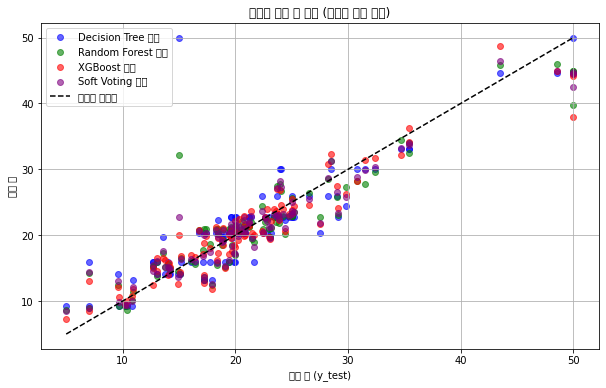

In [44]:
from sklearn.ensemble import VotingRegressor
import matplotlib.pyplot as plt

def plot_model_comparison_with_voting(y_test, y_pred_dt, y_pred_rf, y_pred_xgb, y_pred_voting):
    """
    Decision Tree, Random Forest, XGBoost 예측 값을 색깔을 다르게 하여 비교하는 그래프를 그립니다.
    y_test: 실제 값
    y_pred_dt: Decision Tree 예측 값
    y_pred_rf: Random Forest 예측 값
    y_pred_xgb: XGBoost 예측 값
    y_pred_voting: Soft Voting 예측 값
    """
    plt.figure(figsize=(10, 6))
    
    # Decision Tree 예측 값 (파란색으로 표시)
    plt.scatter(y_test, y_pred_dt, color='blue', label='Decision Tree 예측', alpha=0.6)
    
    # Random Forest 예측 값 (초록색으로 표시)
    plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest 예측', alpha=0.6)
    
    # XGBoost 예측 값 (빨간색으로 표시)
    plt.scatter(y_test, y_pred_xgb, color='red', label='XGBoost 예측', alpha=0.6)
    
    # Soft Voting 예측 값 (보라색으로 표시)
    plt.scatter(y_test, y_pred_voting, color='purple', label='Soft Voting 예측', alpha=0.6)
    
    # 완벽한 예측선 (y = x)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='완벽한 예측선')
    
    plt.xlabel('실제 값 (y_test)')
    plt.ylabel('예측 값')
    plt.title('모델별 예측 값 비교 (소프트 보팅 포함)')
    plt.legend()
    plt.grid(True)
    plt.show()

# 예시 사용법
# X_train, X_test, y_train, y_test는 이미 준비되어 있다고 가정합니다.

# 모델들
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# 모델 초기화
dt_model = DecisionTreeRegressor(max_depth=5)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5)
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# 모델 학습
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# 소프트 보팅을 위한 모델 결합
voting_model = VotingRegressor(estimators=[('dt', dt_model), ('rf', rf_model), ('xgb', xgb_model)])
voting_model.fit(X_train, y_train)

# 예측값 생성
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_voting = voting_model.predict(X_test)

# 실제 값(y_test)와 예측 값들(y_pred_dt, y_pred_rf, y_pred_xgb, y_pred_voting)을 비교하는 그래프 그리기
plot_model_comparison_with_voting(y_test, y_pred_dt, y_pred_rf, y_pred_xgb, y_pred_voting)


In [45]:
import pandas as pd

def create_comparison_table(y_test, y_pred_dt, y_pred_rf, y_pred_xgb, y_pred_voting):
    """
    4가지 모델의 예측 값을 비교하는 표를 생성합니다.
    y_test: 실제 값
    y_pred_dt: Decision Tree 예측 값
    y_pred_rf: Random Forest 예측 값
    y_pred_xgb: XGBoost 예측 값
    y_pred_voting: Soft Voting 예측 값
    """
    # 실제 값과 각 모델의 예측 값들을 하나의 DataFrame으로 합치기
    comparison_df = pd.DataFrame({
        '실제 값 (y_test)': y_test,
        'Decision Tree 예측': y_pred_dt,
        'Random Forest 예측': y_pred_rf,
        'XGBoost 예측': y_pred_xgb,
        'Soft Voting 예측': y_pred_voting
    })
    
    return comparison_df

# 예시 사용법
# X_test, y_test, y_pred_dt, y_pred_rf, y_pred_xgb, y_pred_voting는 이미 준비되어 있다고 가정합니다.

# 예측 값들을 표로 생성
comparison_table = create_comparison_table(y_test, y_pred_dt, y_pred_rf, y_pred_xgb, y_pred_voting)

# 표 출력
print(comparison_table.head())  # 첫 5개 행만 출력


     실제 값 (y_test)  Decision Tree 예측  Random Forest 예측  XGBoost 예측  \
173           23.6         22.726190         21.944935   23.691797   
274           32.4         30.050000         29.578628   31.711241   
491           13.6         19.733333         17.301911   16.610657   
72            22.8         20.355556         22.489262   23.944931   
452           16.1         15.910526         16.067899   16.949919   

     Soft Voting 예측  
173       22.982387  
274       30.392315  
491       17.674425  
72        22.232230  
452       16.384688  


In [46]:
import pandas as pd

# 실제 값과 각 모델들의 예측 값
comparison_df = pd.DataFrame({
    '실제 값 (y_test)': y_test,
    'Decision Tree 예측': y_pred_dt,
    'Random Forest 예측': y_pred_rf,
    'XGBoost 예측': y_pred_xgb,
    'Soft Voting 예측': y_pred_voting
})

# CSV 파일로 저장
comparison_df.to_csv('model_comparison.csv', index=False)


In [47]:
import pandas as pd

# 실제 값과 각 모델들의 예측 값
comparison_df = pd.DataFrame({
    '실제 값 (y_test)': y_test,
    'Decision Tree 예측': y_pred_dt,
    'Random Forest 예측': y_pred_rf,
    'XGBoost 예측': y_pred_xgb,
    'Soft Voting 예측': y_pred_voting
})

# CSV 파일로 저장
file_path = 'model_comparison_all.csv'  # 원하는 파일 경로로 수정 가능
comparison_df.to_csv(file_path, index=False)

print(f"파일이 성공적으로 저장되었습니다: {file_path}")


파일이 성공적으로 저장되었습니다: model_comparison_all.csv
